# Ансамбли моделей машинного обучения. Часть 2

## Загрузка датасета

In [2]:
import pandas as pd
df = pd.read_csv('GM_players_statistics.csv')

In [3]:
df.dtypes

ID                             int64
name                          object
username                      object
profile                       object
user_id                        int64
title                         object
fide                         float64
country                       object
followers                      int64
joined                        object
last_online                   object
current_rapid_rating         float64
highest_rapid_rating         float64
highest_rapid_date            object
rapid_win                    float64
rapid_draw                   float64
rapid_loss                   float64
current_blitz_rating         float64
highest_blitz_rating         float64
highest_blitz_date            object
blitz_win                    float64
blitz_draw                   float64
blitz_loss                   float64
current_bullet_rating        float64
highest_bullet_rating        float64
highest_bullet_date           object
bullet_win                   float64
b

In [4]:
df.head()

,ID,name,username,profile,user_id,title,fide,country,followers,joined,...,highest_bullet_date,bullet_win,bullet_draw,bullet_loss,highest_tactics_rating,highest_tactics_date,highest_puzzle_rush_score,is_streamer,status,league
0,0,Komodo Engine,komodochess,https://www.chess.com/member/KomodoChess,24944922,GM,3411.0,United States,494,07/11/2015,...,NaN,NaN,NaN,NaN,400,07/11/2015,NaN,False,premium,NaN
1,1,Vojtěch Plát,vojtechplat,https://www.chess.com/member/VojtechPlat,37712368,GM,2950.0,Czech Republic,360,11/08/2017,...,27/09/2021,32.0,8.0,47.0,3251,15/09/2021,49.0,False,premium,Bronze
2,2,PlayMagnus Carlsen,playmagnus,https://www.chess.com/member/PlayMagnus,19578862,GM,2882.0,Norway,199,05/11/2014,...,NaN,NaN,NaN,NaN,400,05/11/2014,NaN,False,premium,NaN
3,3,Magnus Carlsen,magnuscarlsen,https://www.chess.com/member/MagnusCarlsen,3889224,GM,2882.0,Norway,142482,27/08/2010,...,28/03/2023,662.0,98.0,246.0,400,27/08/2010,NaN,False,premium,Elite
4,4,Fabiano Caruana,fabianocaruana,https://www.chess.com/member/FabianoCaruana,11177810,GM,2835.0,United States,14445,17/03/2013,...,30/11/2021,713.0,65.0,203.0,3519,14/06/2023,64.0,False,premium,Crystal


**Удаление служебных колонок**

In [5]:
df = df.drop(columns=['ID', 'user_id'])
df.head()

,name,username,profile,title,fide,country,followers,joined,last_online,current_rapid_rating,...,highest_bullet_date,bullet_win,bullet_draw,bullet_loss,highest_tactics_rating,highest_tactics_date,highest_puzzle_rush_score,is_streamer,status,league
0,Komodo Engine,komodochess,https://www.chess.com/member/KomodoChess,GM,3411.0,United States,494,07/11/2015,17/09/2018,NaN,...,NaN,NaN,NaN,NaN,400,07/11/2015,NaN,False,premium,NaN
1,Vojtěch Plát,vojtechplat,https://www.chess.com/member/VojtechPlat,GM,2950.0,Czech Republic,360,11/08/2017,13/07/2023,2383.0,...,27/09/2021,32.0,8.0,47.0,3251,15/09/2021,49.0,False,premium,Bronze
2,PlayMagnus Carlsen,playmagnus,https://www.chess.com/member/PlayMagnus,GM,2882.0,Norway,199,05/11/2014,08/12/2014,NaN,...,NaN,NaN,NaN,NaN,400,05/11/2014,NaN,False,premium,NaN
3,Magnus Carlsen,magnuscarlsen,https://www.chess.com/member/MagnusCarlsen,GM,2882.0,Norway,142482,27/08/2010,15/07/2023,2925.0,...,28/03/2023,662.0,98.0,246.0,400,27/08/2010,NaN,False,premium,Elite
4,Fabiano Caruana,fabianocaruana,https://www.chess.com/member/FabianoCaruana,GM,2835.0,United States,14445,17/03/2013,16/07/2023,2794.0,...,30/11/2021,713.0,65.0,203.0,3519,14/06/2023,64.0,False,premium,Crystal


## Масштабирование

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for column in df.columns:
    if str(df[column].dtype ) in ['float64', 'int64']:
        df[[column]] = scaler.fit_transform(df[[column]])

df.head()

,name,username,profile,title,fide,country,followers,joined,last_online,current_rapid_rating,...,highest_bullet_date,bullet_win,bullet_draw,bullet_loss,highest_tactics_rating,highest_tactics_date,highest_puzzle_rush_score,is_streamer,status,league
0,Komodo Engine,komodochess,https://www.chess.com/member/KomodoChess,GM,1.000000,United States,0.000424,07/11/2015,17/09/2018,NaN,...,NaN,NaN,NaN,NaN,0.000000,07/11/2015,NaN,False,premium,NaN
1,Vojtěch Plát,vojtechplat,https://www.chess.com/member/VojtechPlat,GM,0.864849,Czech Republic,0.000309,11/08/2017,13/07/2023,0.789572,...,27/09/2021,0.000543,0.001637,0.001247,0.446935,15/09/2021,0.193676,False,premium,Bronze
2,PlayMagnus Carlsen,playmagnus,https://www.chess.com/member/PlayMagnus,GM,0.844914,Norway,0.000171,05/11/2014,08/12/2014,NaN,...,NaN,NaN,NaN,NaN,0.000000,05/11/2014,NaN,False,premium,NaN
3,Magnus Carlsen,magnuscarlsen,https://www.chess.com/member/MagnusCarlsen,GM,0.844914,Norway,0.122411,27/08/2010,15/07/2023,0.991434,...,28/03/2023,0.011235,0.020049,0.006528,0.000000,27/08/2010,NaN,False,premium,Elite
4,Fabiano Caruana,fabianocaruana,https://www.chess.com/member/FabianoCaruana,GM,0.831135,United States,0.012410,17/03/2013,16/07/2023,0.942644,...,30/11/2021,0.012101,0.013298,0.005387,0.488948,14/06/2023,0.252964,False,premium,Crystal


## Заполнение пропусков

In [7]:
from sklearn.impute import SimpleImputer

num_cols = []

for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)

    if dt=='float64' or dt=='int64':
        num_cols.append(col)
    
    if temp_null_count == 0:
        continue

    imp_strategy=''
    if dt=='float64' or dt=='int64':
        imp_strategy = 'mean'
    else:
        imp_strategy = 'most_frequent'

    imp_num = SimpleImputer(strategy=imp_strategy)
    data_num_imp = imp_num.fit_transform(df[[col]])
    df[[col]] = data_num_imp

df[num_cols].head()

,fide,followers,current_rapid_rating,highest_rapid_rating,rapid_win,rapid_draw,rapid_loss,current_blitz_rating,highest_blitz_rating,blitz_win,blitz_draw,blitz_loss,current_bullet_rating,highest_bullet_rating,bullet_win,bullet_draw,bullet_loss,highest_tactics_rating,highest_puzzle_rush_score
0,1.000000,0.000424,0.789392,0.734816,0.022853,0.011191,0.017977,0.805131,0.741373,0.036647,0.051597,0.032712,0.687330,0.679055,0.016056,0.019792,0.017231,0.000000,0.211901
1,0.864849,0.000309,0.789572,0.797832,0.007687,0.004348,0.006834,0.846966,0.797775,0.024484,0.053060,0.026486,0.690227,0.689512,0.000543,0.001637,0.001247,0.446935,0.193676
2,0.844914,0.000171,0.789392,0.734816,0.022853,0.011191,0.017977,0.805131,0.741373,0.036647,0.051597,0.032712,0.687330,0.679055,0.016056,0.019792,0.017231,0.000000,0.211901
3,0.844914,0.122411,0.991434,0.963144,0.027546,0.020000,0.009112,1.000000,0.995162,0.035170,0.055334,0.010444,0.946771,0.931844,0.011235,0.020049,0.006528,0.000000,0.211901
4,0.831135,0.012410,0.942644,1.000000,0.078155,0.089565,0.052392,0.946570,0.905177,0.025387,0.036763,0.010069,0.851222,0.826959,0.012101,0.013298,0.005387,0.488948,0.252964


<Axes: >

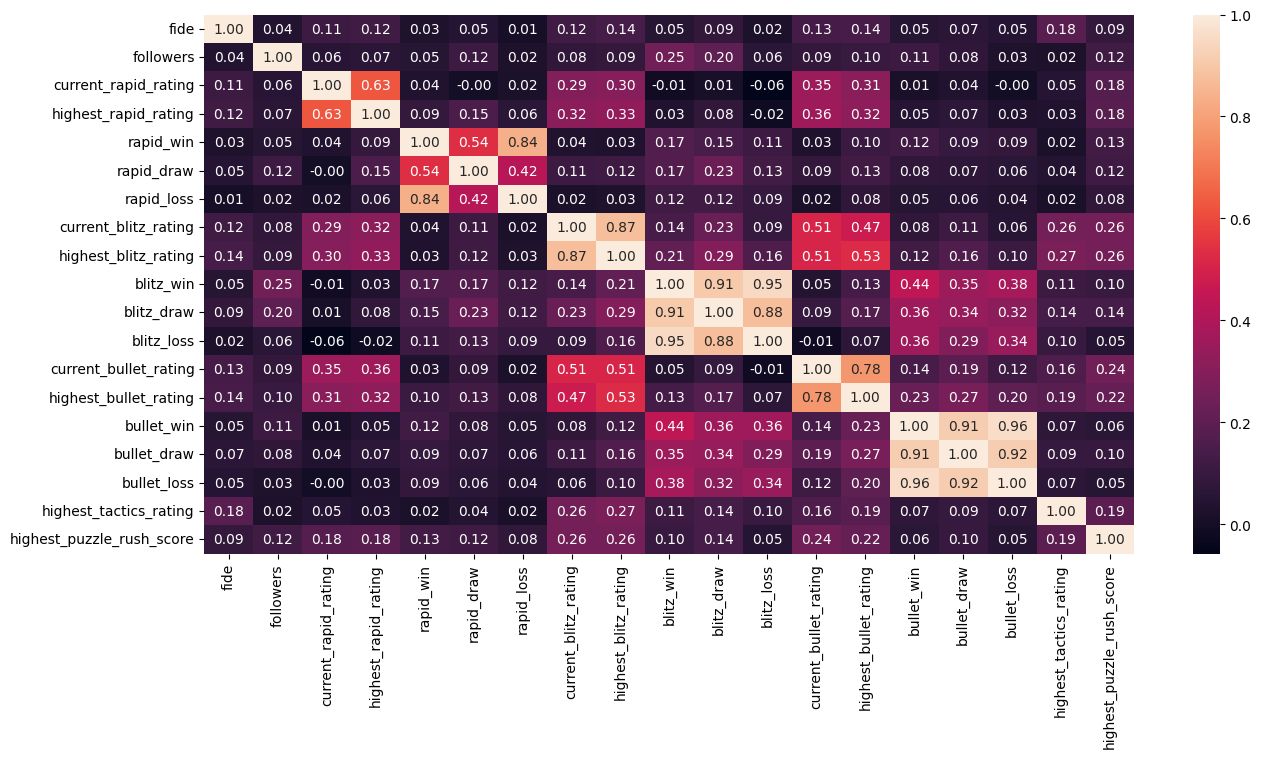

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df[num_cols].corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

## Разбиение на обучающую и тестовую выборки

In [9]:
from sklearn.model_selection import train_test_split

x_df = df[num_cols].drop(columns='highest_rapid_rating') # числовые колонки

y_df = df['highest_rapid_rating'] # колонка с закодированной лигой

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=42)

## Стекинг

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Качество отдельных моделей
def val_mae(model):
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    result = mean_absolute_error(y_test, y_predict)
    print(model)
    print('MAE={}'.format(result))

# Точность на отдельных моделях
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model)
    print('==========================')
    print()

LinearRegression()
MAE=0.05643517974422025

DecisionTreeRegressor()
MAE=0.06366796146564473

RandomForestRegressor(n_estimators=50)
MAE=0.04738779154742283



In [11]:
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset

dataset = Dataset(x_train, y_train, x_test)

# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True},name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')

In [12]:
# Эксперимент 1
# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: линейная регрессия

pipeline = ModelsPipeline(model_rf, model_tree)
stack_ds = pipeline.stack(k=10, seed=1)

# модель второго уровня
stacker_e1 = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker_e1.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.038141523440478754, 0.060706245546055894, 0.0360439153406983, 0.04137681465729493, 0.032817163906071284, 0.04351524992381154, 0.04202493798459567, 0.037978120364205094, 0.03749003994732718, 0.03669679447964129]
Mean accuracy: 0.040679080559018
Standard Deviation: 0.007310860508651059
Variance: 5.3448681376953626e-05


In [13]:
stack_e1_predict = stacker_e1.predict()

In [14]:
# Эксперимент 2
# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: случайный лес

stacker_e2 = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker_e2.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.041091679975027155, 0.05739456189033813, 0.04092779501658212, 0.049231014288999904, 0.04258316874502938, 0.04466710835915673, 0.04383084082090161, 0.04194935575366535, 0.044557355929938286, 0.04405690000909044]
Mean accuracy: 0.04502897807887292
Standard Deviation: 0.004701985675755452
Variance: 2.210866929500946e-05


In [15]:
stack_e2_predict = stacker_e2.predict()

In [16]:
from sklearn.svm import LinearSVR

model_svm = Regressor(dataset=dataset, estimator=LinearSVR, name='svm')

# Эксперимент 3
# Первый уровень - три модели: дерево, метод опорных векторов и случайный лес
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_tree, model_svm, model_rf)
stack_ds3 = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker_e3 = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker_e3.validate(k=10,scorer=mean_absolute_error)

C:\Users\Dmitriy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Dmitriy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dmitriy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Dmitriy\AppData\Local\Packages\PythonSoftwareFoundation

Metric: mean_absolute_error
Folds accuracy: [0.03798767318957636, 0.06048672370467941, 0.036009322625213065, 0.04133677101344225, 0.032675987789264054, 0.04358094206641406, 0.04270569736608003, 0.03894373819759603, 0.03819443607534099, 0.03648884447082383]
Mean accuracy: 0.04084101364984301
Standard Deviation: 0.007244886422972854
Variance: 5.2488379281776385e-05


In [17]:
stack_e3_predict = stacker_e3.predict()

## Многослойный персептрон

In [46]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(random_state=42, max_iter=500).fit(x_train, y_train)
mlpr_predict = mlpr.predict(x_test)

mlpr.score(x_test, y_test)

0.32487419937908624

## Group Method of Data Handling (МГУА)

#### Combi

In [19]:
from gmdh import Combi, Criterion, CriterionType
from sklearn.metrics import mean_absolute_error
import numpy as np

combi_r = Combi()
combi_r.fit(np.array(x_train), y_train, verbose=1, n_jobs=-1, test_size=0.25, limit=0)

LEVEL 1  [=========================] 100% :00s] (18 combinations) error=1.685068
LEVEL 2  [=========================] 100% :00s] (153 combinations) error=1.636245
LEVEL 3  [=========================] 100% :00s] (816 combinations) error=1.618393
LEVEL 4  [=========================] 100% :00s] (3060 combinations) error=1.618344
LEVEL 5  [=========================] 100% :00s] (8568 combinations) error=1.613725
LEVEL 6  [=========================] 100% :00s] (18564 combinations) error=1.611023
LEVEL 7  [=========================] 100% :00s] (31824 combinations) error=1.610808
LEVEL 8  [=========================] 100% :00s] (43758 combinations) error=1.61271


In [20]:
combi_predict = combi_r.predict(x_test)

#### Multi
Улучшенная версия `Combi`

In [21]:
from gmdh import Multi
import numpy as np

multi_r = Multi()
multi_r.fit(np.array(x_train), y_train, verbose=1, n_jobs=-1, test_size=0.25, limit=0)

LEVEL 1  [=========================] 100% :00s] (18 combinations) error=1.685068
LEVEL 2  [=========================] 100% :00s] (17 combinations) error=1.636245
LEVEL 3  [=========================] 100% :00s] (16 combinations) error=1.618393
LEVEL 4  [=========================] 100% :00s] (15 combinations) error=1.618344
LEVEL 5  [=========================] 100% :00s] (14 combinations) error=1.618529


In [22]:
multi_predict = multi_r.predict(x_test)

## Mia

In [23]:
from gmdh import Mia

mia_r = Mia()
mia_r.fit(np.array(x_train), y_train, verbose=1, n_jobs=-1, test_size=0.25, limit=0)

LEVEL 1  [>                        ] 0% :00s] (153 combinations)

LEVEL 1  [=========================] 100% :00s] (153 combinations) error=1.503346
LEVEL 2  [=========================] 100% :00s] (3 combinations) error=1.46986
LEVEL 3  [=========================] 100% :00s] (3 combinations) error=1.484224


In [24]:
mia_predict = mia_r.predict(x_test)

## Сравнение качества моделей

In [28]:
from sklearn.metrics import mean_absolute_percentage_error

quality_titles = [
    'stacking #1: random forest + tree       => linear regression',
    'stacking #2: random forest + tree       => random forest    ',
    'stacking #3: random forest + tree + svm => linear regression',
    'MLPR',
    'Combi',
    'Multi',
    'Mia'
]

predicts = [
    stack_e1_predict,
    stack_e2_predict,
    stack_e3_predict,
    mlpr_predict,
    combi_predict,
    multi_predict,
    mia_predict
]

for i in range(len(quality_titles)):
    print(quality_titles[i] + '\n--> {:.5f}%\n'.format(mean_absolute_error(predicts[i], y_test) * 100))

stacking #1: random forest + tree       => linear regression
--> 4.77669%

stacking #2: random forest + tree       => random forest    
--> 5.25057%

stacking #3: random forest + tree + svm => linear regression
--> 4.76211%

MLPR
--> 6.79817%

Combi
--> 5.56431%

Multi
--> 5.57089%

Mia
--> 5.38073%

